# 와인 품질 예측하기


![](https://labelyourdata.com/img/article-illustrations/ml_essential_tool.jpg)

## 1.환경준비

### (1) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [ ]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [ ]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/winequality-white.csv"
data = pd.read_csv(path)
data['quality'] = np.where(data['quality'] == 3, 4, np.where(data['quality'] == 9, 8, data['quality']))
data['quality'] = data['quality'] - 4
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


* 범주가 5개 입니다.
    * 0 - 최하  ~  4 - 최상

In [ ]:
data['quality'].value_counts()

,count
quality,
2,2198
1,1457
3,880
0,183
4,180


## 2.데이터 준비

### (1) 데이터 준비
* y에 대한 전처리 : 위에서 이미 0 ~ 4로 범주를 맞췄습니다.
* x, y 나누기

In [ ]:
target = 'quality'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (2) 데이터 분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size= .3, random_state = 20)

### (3) 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

최소 3개 이상의 모델을 생성하고 성능을 비교하시오.

In [ ]:
n=x_train.shape[1]
n

11

### (1) 모델1

In [ ]:
clear_session()

model=Sequential([ Input(shape=(n,)),
                   Dense(100,activation='relu'),
                   Dense(50,activation='relu'),
                   Dense(5,activation='softmax')])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             255 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,505 (25.41 KB)

 Trainable params: 6,505 (25.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy')

history=model.fit(x_train,y_train,epochs=50,validation_split=0.2).history

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2897 - val_loss: 1.0372
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1182 - val_loss: 1.0117
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1051 - val_loss: 0.9999
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1219 - val_loss: 1.0101
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0919 - val_loss: 0.9967
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0911 - val_loss: 0.9616
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0622 - val_loss: 0.9659
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0924 - val_loss: 0.9932
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0646 - val_loss: 0.9687
Epoch 10/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0477 - val_loss: 0.9544
Epoch 11/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0492 - val_loss: 0.9822
Epoch 12/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0744 - val_lo

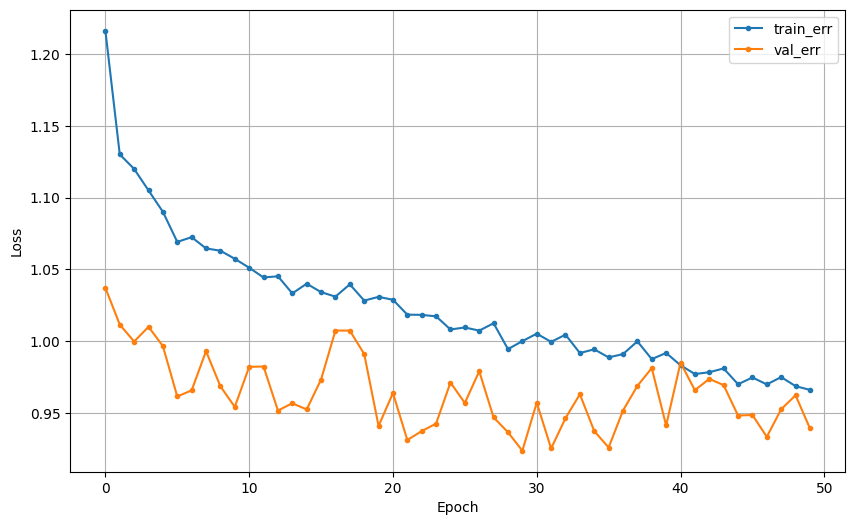

In [ ]:
dl_history_plot(history)

In [ ]:
pred=model.predict(x_val)
pred=np.argmax(pred,axis=1)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print(confusion_matrix(y_val,pred))
print(classification_report(y_val,pred))

[[ 11  37  13   0   0]
 [  6 284 141   6   1]
 [  2 152 430  76   0]
 [  0   8 161  77   4]
 [  0   1  31  26   3]]
              precision    recall  f1-score   support

           0       0.58      0.18      0.28        61
           1       0.59      0.65      0.62       438
           2       0.55      0.65      0.60       660
           3       0.42      0.31      0.35       250
           4       0.38      0.05      0.09        61

    accuracy                           0.55      1470
   macro avg       0.50      0.37      0.39      1470
weighted avg       0.53      0.55      0.53      1470



### (2) 모델2

In [ ]:
clear_session()

model2=Sequential([ Input(shape=(n,)),
                   Dense(60,activation='relu'),
                   Dense(5,activation='softmax')])
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 60)                  │             720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             305 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy')

history2=model2.fit(x_train,y_train,epochs=30,validation_split=0.3).history

Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3634 - val_loss: 1.1127
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1928 - val_loss: 1.0627
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1390 - val_loss: 1.0482
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0962 - val_loss: 1.0290
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0991 - val_loss: 1.0321
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1237 - val_loss: 1.0099
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1041 - val_loss: 1.0170
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0938 - val_loss: 1.0131
Epoch 9/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0457 - val_loss: 1.0647
Epoch 10/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0830 - val_loss: 1.0629
Epoch 11/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0885 - val_loss: 0.9982
Epoch 12/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0925 - val_lo

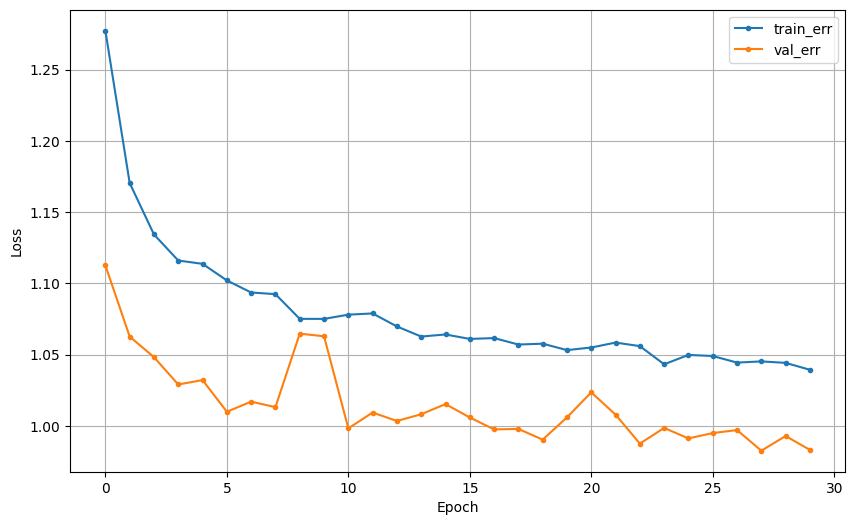

In [ ]:
dl_history_plot(history2)

### (3) 모델3